#Упражнение 1
  <p>Скачайте с сайта <a href="https://freesound.org/">https://freesound.org/</a> обрзец звука, включающий музыку, речь или иные звуки, имеющие четко выраженную высоту. Выделите примерно полусекундный сегмент, в котором высота постоянна. Вычислите и распечатайте спектр выбранного сегмента. Как связанны тембр звука и гармоническая структура, видимая в спепктре?</p>
<p>
  Используйте high_pass, low_pass и band_stop для фильтрации тех или иных гармоник. Затем преобразуйте спектры обратно в сигнал и прослушайте его. Как звук соотносится с изменениями, сделанными в спектре?
  </p>

In [1]:
# Get thinkdsp.py
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-04-10 10:53:59--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-04-10 10:53:59--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.001s  

2022-04-10 10:53:59 (33.2 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



Загружаем аудиозапись мелодии гитары


In [30]:
if not os.path.exists('626107__d0tdashdialup__cowbell-beat.wav'):
    !wget https://github.com/vitekkor/telecom-2022/raw/master/resources/626107__d0tdashdialup__cowbell-beat.wav

--2022-04-10 12:04:57--  https://github.com/vitekkor/telecom-2022/raw/master/resources/626107__d0tdashdialup__cowbell-beat.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vitekkor/telecom-2022/master/resources/626107__d0tdashdialup__cowbell-beat.wav [following]
--2022-04-10 12:04:57--  https://raw.githubusercontent.com/vitekkor/telecom-2022/master/resources/626107__d0tdashdialup__cowbell-beat.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1507372 (1.4M) [audio/wav]
Saving to: ‘626107__d0tdashdialup__cowbell-beat.wav’

626107__d0tdashdial 100%[===================>]   1.44M  --.-KB/s    i

Создаем объект wave

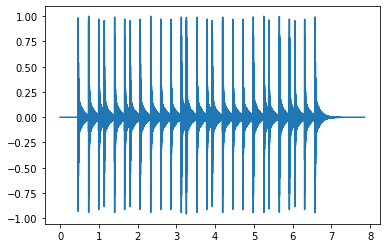

In [31]:
from thinkdsp import read_wave

wave = read_wave('626107__d0tdashdialup__cowbell-beat.wav')
wave.plot()
wave.make_audio()

Выбираем сегмент в котором высота постоянна.

In [32]:
segment = wave.segment(1.3,0.5)
segment.make_audio()

Вычислим спектр и посмотрим его.


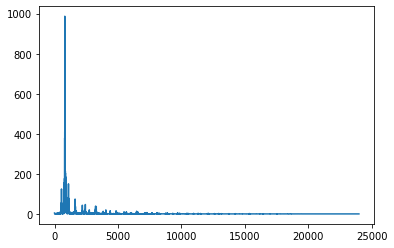

In [33]:
spectrum = segment.make_spectrum()
spectrum.plot()

Как мы видим звук локализован в первых 5000 ГЦ



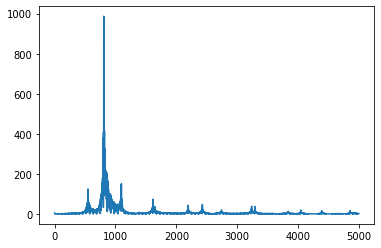

In [36]:
spectrum.plot(high = 5000)

Приблизим спектограмму до 2000

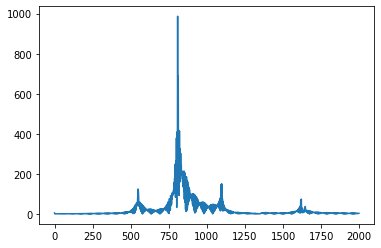

In [37]:
spectrum.plot(2000)

Обрежем от нашего сегмента все что выше 2000 ГЦ, послушаем как изменится звук.


In [38]:
spectrum.low_pass(2000)
filtered = spectrum.make_wave()

Исходный звук:

In [39]:
segment.make_audio()

Отфильтрованный выше 200 ГЦ:

In [40]:
filtered.make_audio()

Как видим звук стал приглушеннее и как будто бы хуже по качеству, что закономерно т.к. мы обрезали частоты, следовательно изменили форму сигнала, она стала проще, что сказывается на тембре и восприятии звука.

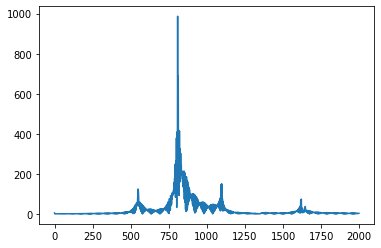

In [41]:
spectrum.plot(2000)

Посмотрим на пики еще раз, и разберем их.


In [42]:
spectrum.peaks()[:5]

[(987.0829281907503, 808.0),
 (688.1547142612326, 812.0),
 (415.79568244281415, 816.0),
 (414.80773982377616, 820.0),
 (409.23384183086824, 804.0)]

Основной и доминирующей частотой является 808ГЦ. Это гармоника, нота соль второй октавы или G5 (784 Гц).<br>
812Гц - это гармоника, нота соль диез второй октавы или G#5 (830 Гц)<br>
820Гц - тоже гармоника, нота соль диез второй октавы или G#5 (830 Гц)

По этим трем нотам можно попробовать создать аналогичное звучание

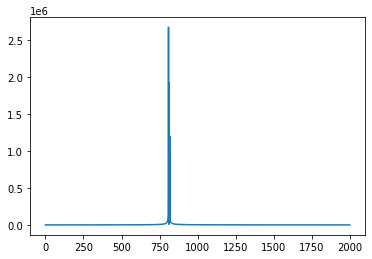

In [51]:
from thinkdsp import SinSignal
E_note = SinSignal(808,amp=987,offset = 0)
E_note += SinSignal(812,amp=688,offset = 0)
E_note += SinSignal(816,amp=415,offset = 0)
my_wave = E_note.make_wave(duration=0.5)
my_spectrum = my_wave.make_spectrum()
my_spectrum.plot(high = 2000)

Исходный сигнал, обрезанный сверху по 2000 ГЦ:

In [49]:
filtered.make_audio()

Собранный по трем нотам сигнал:

In [52]:
my_wave.make_audio()

Получилось достаточно похоже

Теперь обрежем нашу основную частоту, и сигнал должен стать на октаву выше.

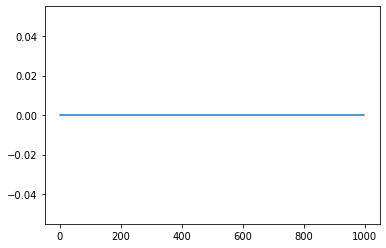

In [57]:
spectrum.high_pass(1000)
spectrum.plot(1000)

In [58]:
higher_E = spectrum.make_wave()
higher_E.make_audio()

Звук стал выше, теперь вырежем G5, и звук должен стать очень сухим, т.к. останется отдна доминирующая основная частота.

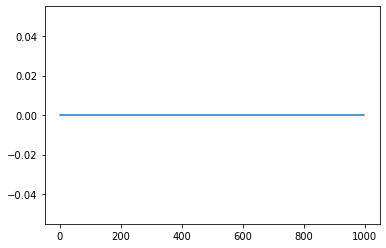

In [61]:
spectrum.band_stop(800,900)
spectrum.plot(1000)
dry_E = spectrum.make_wave()
dry_E.make_audio()

Теперь забавы ради возьмем оригинальный сигнал, и вырежем три ноты соль, посмотрим что останется

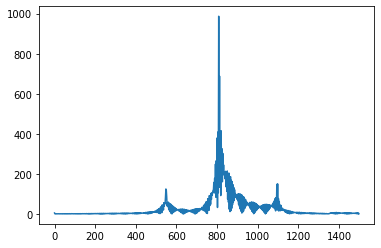

In [62]:
funny_spec = segment.make_spectrum()
funny_spec.plot(1500)

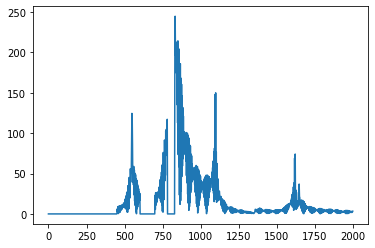

In [64]:
funny_spec.high_pass(450)
funny_spec.band_stop(780,830)
funny_spec.plot(2000)

In [67]:
funny_spec.peaks()[:10]

[(244.8929887587563, 832.0),
 (214.38994002652754, 850.0),
 (212.83042636816847, 842.0),
 (211.01706675567587, 836.0),
 (206.7808414427686, 838.0),
 (206.59357984167605, 846.0),
 (204.25856653573948, 858.0),
 (199.01011361551807, 854.0),
 (196.57791690782747, 834.0),
 (195.4174005437465, 830.0)]

Теперь мы видим,что основная частота 830 ГЦ - соль диез второй октавы<br>
Доминирующая частота - 832 ГЦ<br>

In [66]:
funny_wave = funny_spec.make_wave()
funny_wave.make_audio()

# Упражнение 2
Создайте сложный сигнал из объектов SinSignal и CosSignal, суммируя их. Обработайте сигнал для получения wave и прослушайте его. Вычислите Spectrum и распечатайте. Что произойдет при добавлении частот, не кратных основным?

Соберем аккорд ля мажор

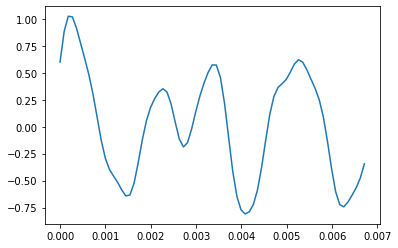

In [69]:
from thinkdsp import SinSignal, CosSignal

sin_A4 = SinSignal(freq=440.00,amp=0.7,offset=0)
cos_C5_sharp = CosSignal(freq=554.4,amp=0.4,offset=0)
sin_E5 = SinSignal(freq=659.26,amp=0.3,offset=0)
cos_A5 = CosSignal(freq=880,amp=0.2,offset=0)
sin_A6 = SinSignal(freq=1760.00,amp=0.05,offset=0)
Am = sin_A4 + cos_C5 + sin_E5 + cos_A5 + sin_A6
Am_wave = Am.make_wave(duration=1)
Am.plot()
Am_wave.make_audio()

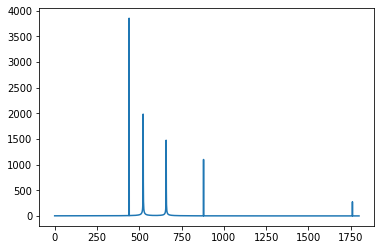

In [70]:
spectrum = Am_wave.make_spectrum()
spectrum.plot(high = 1800)

Мы можем добавить какую нибудь ноту, отличающуюся на полтона, и тогда должен получится "анти музыкальный" звук - звук который используют в "страшилках".

Добавим ноту A4# - ля диез первой октавы


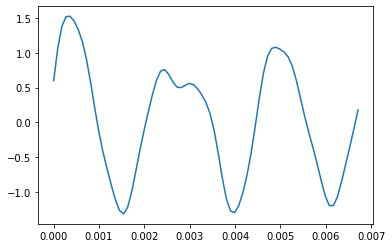

In [71]:
sin_A4_diez = SinSignal(freq=466.94,amp=0.7,offset=0)
brr_am = Am + sin_A4_diez
brr_am_wave = brr_am.make_wave(duration=1)
brr_am.plot()
brr_am_wave.make_audio()

Получилось действительно страшно и нагтетающе.

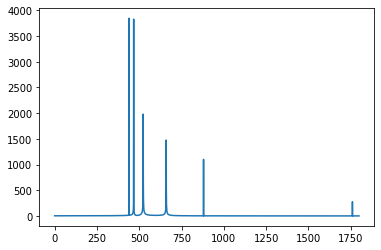

In [72]:
spectrum = brr_am_wave.make_spectrum()
spectrum.plot(high = 1800)

# Упражнение 3
Напишите функцию stretch, берущую wave и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением ts и framerate.

In [73]:
def stretch(wave, k):
  wave.ts /= k
  wave.framerate *= k

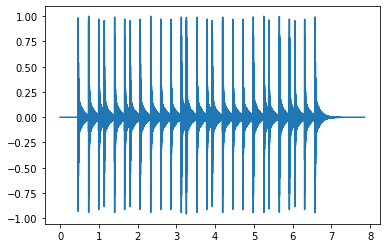

In [74]:
wave = read_wave('626107__d0tdashdialup__cowbell-beat.wav')
wave.plot()
wave.make_audio()

Замедлим нашу запись в полтора раза

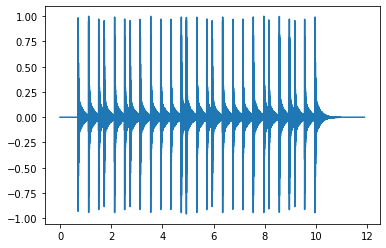

In [75]:
stretch(wave,0.66)
wave.plot()
wave.make_audio()

Ускорим в полтора в 2 раза

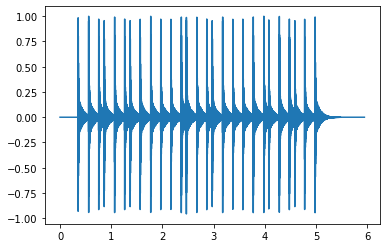

In [76]:
stretch(wave,2)
wave.plot()
wave.make_audio()